<a href="https://colab.research.google.com/github/med-tz/elelction_Tunisie/blob/main/Source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**chargement de tous les packages nécessaires**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import seaborn as sns

from sklearn.model_selection import train_test_split

In [29]:
## Affichage de plus de lignes pour les output
pd.options.display.max_rows = 500

**chargement de la base de donnee**

In [30]:
drive.mount('/content/drive')
Base=pd.read_excel('/content/drive/MyDrive/stat up/Base.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:

Base.head(10)

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q22_9,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids
0,1,1,1,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,3.0,NaN,NaN,NaN,3.0,2,1,NaN,1,1,1,4,4,98,NaN,2,2.0,3,1,3,2,2,2,3,2,2,3,2,...,2,1,2.0,2.0,2.0,4,5.0,6,2,3,6.0,5.0,3,2,3,3,2,2,3,2,2,3,4,2,4,3,2,3,5,2,2,10,1,3,1,1.693877,1.123561,1.033677,478.352606,602.470102
1,2,1,2,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,37,NaN,2,NaN,NaN,4.0,NaN,NaN,2,2,4.0,1,1,1,4,4,1,2.0,8,2.0,2,3,3,2,3,3,3,2,3,3,2,...,2,1,NaN,NaN,NaN,5,1.0,1,1,3,6.0,4.0,3,3,3,4,2,2,3,2,2,3,4,2,3,3,3,3,3,3,2,4,2,4,3,0.853806,0.645277,0.636774,956.705212,995.519830
2,3,1,2,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,22,NaN,1,2.0,NaN,NaN,NaN,3.0,1,2,4.0,1,1,98,4,3,98,NaN,96,2.0,3,3,99,3,99,99,3,3,99,99,3,...,3,1,NaN,NaN,NaN,2,10.0,3,3,6,8.0,9.0,3,2,5,4,5,5,4,3,5,5,4,3,3,3,3,3,3,2,2,10,1,6,2,1.849603,1.290227,1.213185,956.705212,1094.787094
3,4,1,3,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,53,NaN,1,3.0,NaN,NaN,NaN,1.0,2,1,NaN,1,98,98,2,4,2,2.0,1,1.0,1,3,3,3,3,3,3,3,3,3,2,...,3,2,98.0,1.0,98.0,5,98.0,3,5,3,97.0,NaN,1,5,5,5,5,5,5,5,5,5,2,2,2,5,5,2,5,5,5,5,2,4,3,0.855732,0.817558,0.559571,1435.057818,537.636292
4,5,1,3,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,27,NaN,1,2.0,NaN,NaN,NaN,1.0,2,2,4.0,1,1,1,3,4,96,1.0,2,1.0,99,1,2,2,99,99,3,3,99,99,3,...,3,1,NaN,NaN,NaN,1,9.0,4,5,3,8.0,5.0,4,1,2,4,5,5,4,4,5,5,3,3,3,3,3,5,5,2,5,9,1,4,2,1.693877,1.078874,1.017732,1435.057818,1642.180641
5,6,1,2,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,30,NaN,2,NaN,NaN,4.0,NaN,NaN,1,1,NaN,1,1,98,4,3,97,1.0,5,1.0,97,3,3,3,1,99,3,97,99,99,3,...,3,98,2.0,2.0,97.0,8,1.0,6,5,3,8.0,97.0,3,3,3,3,2,3,3,3,3,3,3,98,98,98,98,98,5,5,5,9,2,4,3,1.484786,1.023257,0.947754,956.705212,977.646335
6,7,1,2,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,53,NaN,1,3.0,NaN,NaN,NaN,3.0,2,1,NaN,1,1,1,2,1,9,2.0,2,1.0,3,1,3,3,2,2,3,3,3,3,2,...,3,1,2.0,2.0,97.0,9,1.0,4,2,8,4.0,3.0,3,1,4,2,2,2,3,3,3,4,2,2,3,3,2,4,3,4,2,7,2,3,2,0.893351,0.671736,0.662695,956.705212,722.904039
7,8,1,3,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,49,NaN,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,98,98,4,1,97,2.0,98,NaN,2,2,2,2,2,97,2,99,97,2,97,...,99,98,98.0,98.0,97.0,1,10.0,98,1,98,NaN,NaN,98,98,98,98,98,98,98,5,5,98,98,98,98,98,98,98,98,98,98,3,2,6,2,1.238651,1.247599,1.121917,1435.057818,1439.868275
8,9,1,6,1,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,59,NaN,1,3.0,NaN,NaN,NaN,1.0,1,1,NaN,1,1,1,1,1,2,1.0,9,2.0,3,3,2,2,3,3,3,2,2,3,1,...,2,2,2.0,1.0,97.0,9,4.0,4,1,3,6.0,97.0,3,3,1,1,3,3,3,1,2,3,1,2,3,4,4,4,4,3,2,10,2,4,2,0.787331,0.482712,0.297768,2870.115637,861.071485
9,10,1,5,2,1,Bab El Bhar,Bab El Bhar,Bab El Bhar 7,1,55,NaN,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,1,2,2,1,2,1.0,5,1.0,2,1,3,3,1,1,3,2,3,3,1,...,2,1,7.0,2.0,97.0,10,97.0,4,3,6,8.0,97.0,3,1,2,2,1,2,4,2,5,3,3,3,98,4,2,4,5,4,98,5,2,5,1,0.719912,0.867008,0.866951,2391.763030,1665.694505


**split de la base en test et train**

In [32]:
train,test = train_test_split(Base, test_size = 0.3, random_state = 123)
train=train.reset_index()
train=train.drop(['index'], axis=1)
test=test.reset_index()
test=test.drop(['index'], axis=1)

In [33]:
train.head()

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q22_9,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids
0,3978,332,3,2,8,Nefza,Ouachtata,Ouachtata 2,2,998,5.0,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,2,98,2,98,98,NaN,96,1.0,97,3,3,3,3,3,3,1,99,99,3,...,3,2,1.0,1.0,1.0,3,98.0,98,98,8,3.0,5.0,2,3,3,3,3,3,2,98,5,5,2,3,3,3,3,3,3,3,3,1,3,6,2,1.013224,0.859502,0.801149,539.350085,853.381981
1,7853,655,2,1,14,Meknassy,Meknassy Est,Meknassy Est 10,1,50,NaN,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,1,1,1,3,98,NaN,98,NaN,99,99,99,99,99,99,99,99,99,99,99,...,99,1,99.0,99.0,99.0,3,10.0,1,4,3,6.0,5.0,98,5,5,5,5,5,5,98,5,98,5,5,5,5,5,5,5,98,5,5,2,6,2,0.571798,0.744608,0.662738,414.490134,265.472835
2,237,20,2,1,1,Ezzouhour,Bach-Hamba,Bach-Hamba 19,1,40,NaN,1,6.0,NaN,NaN,NaN,4.0,2,1,NaN,1,1,1,2,1,12,2.0,8,2.0,3,3,2,3,2,2,3,1,3,3,3,...,1,1,1.0,1.0,97.0,9,1.0,1,2,3,8.0,6.0,4,4,2,4,2,2,4,1,5,4,4,4,3,3,2,5,5,2,1,5,2,4,2,0.974041,0.819628,0.685272,723.091149,406.574018
3,5543,462,5,1,15,Sidi El Héni,Sidi El Héni Centre,Sidi El Héni Centre 4,1,19,NaN,2,NaN,NaN,1.0,NaN,NaN,2,2,4.0,1,1,1,4,4,2,2.0,96,1.0,3,3,3,2,3,3,3,3,3,3,2,...,3,1,NaN,NaN,NaN,10,1.0,3,2,3,6.0,8.0,4,2,4,2,4,4,4,4,4,4,1,2,4,4,4,4,4,3,4,4,1,6,2,2.152800,1.866211,1.865003,1794.217343,1073.801664
4,3566,298,5,2,5,Saouaf,Deghafla Ouest,Deghafla Ouest,2,54,NaN,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,98,98,4,98,98,NaN,98,NaN,97,99,99,99,99,99,99,99,99,99,99,...,99,98,98.0,97.0,97.0,3,1.0,98,5,8,2.0,97.0,98,5,5,5,5,5,5,5,5,5,2,5,5,5,5,5,5,5,5,1,2,6,2,0.596075,0.588361,1.177493,539.783491,833.638926


In [34]:
test.head()

,ID,BID,Kish1,Q1,Q2,Q3,Secteur,Block,Q4,Q5,Q6,Q7,Q8,Q8_AUTRES,Q9,Q9_AUTRES,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q19BIS,Q20,Q20BIS,Q21_1,Q21_2,Q21_3,Q21_4,Q21_5,Q21_6,Q21_7,Q21_8,Q21_9,Q21_10,Q22_1,...,Q22_9,Q23,Q25,Q26,Q27,Q28A,Q28B,Q30,Q31,Q32_1,Q32_2,Q32_3,Q34_A,Q34_B,Q34_C,Q34_D,Q34_E,Q34_F,Q34_G,Q34_H,Q34_I,Q34_J,Q34_K,Q35_A,Q35_B,Q35_C,Q35_D,Q35_E,Q35_F,Q35_G,Q35_H,Q52,Q53,Q54,Q55,Pondération1,Pondération2,Pondération3,PoidsInitial,Poids
0,1249,105,4,1,3,Bou Mhel El Bassatine,El Bassatine,El Bassatine 21,1,54,NaN,1,7.0,NaN,NaN,NaN,1.0,2,1,NaN,1,1,1,1,4,1,1.0,1,1.0,1,3,1,3,3,3,3,3,3,3,3,...,3,2,1.0,1.0,6.0,2,8.0,4,4,3,6.0,8.0,2,3,2,3,3,4,4,3,3,3,4,3,3,4,3,3,3,4,3,7,2,4,2,1.082103,0.892018,0.760968,1766.159371,766.218477
1,2852,238,4,2,26,Takelsa,Takelsa Centre,Takelsa Centre 9,1,63,NaN,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,1,98,4,1,98,NaN,8,2.0,2,3,3,3,3,2,2,2,2,2,3,...,3,2,98.0,2.0,98.0,7,98.0,3,3,3,4.0,2.0,3,3,5,5,5,98,98,98,98,98,2,5,5,5,5,5,5,98,5,2,2,6,2,0.829884,0.835953,1.023971,683.124038,680.987430
2,6125,511,2,1,17,Bou Merdès,Bou Merdes,Bou Merdes 5,1,37,NaN,1,7.0,NaN,NaN,NaN,5.0,2,1,NaN,1,98,98,4,1,5,2.0,3,2.0,3,3,1,3,99,99,1,3,3,3,3,...,1,1,1.0,1.0,1.0,1,5.0,3,4,6,2.0,3.0,2,4,1,3,5,5,3,1,5,4,1,4,4,4,4,4,5,5,3,2,2,4,2,0.997230,0.850363,0.724169,429.094266,509.220807
3,7282,607,5,2,27,Skhira,Skhira,Skhira 21,1,998,5.0,2,NaN,NaN,4.0,NaN,NaN,2,1,NaN,1,98,98,2,2,96,1.0,10,1.0,1,3,3,99,99,99,2,99,99,2,99,...,99,1,97.0,97.0,97.0,8,1.0,98,1,8,96.0,97.0,1,1,5,2,5,5,98,5,5,1,1,5,1,5,5,1,5,5,1,1,2,3,1,1.820406,3.303099,4.449546,1156.321315,2068.529999
4,4452,371,3,2,10,Tajerouine,Cité Bourguiba,Cité Bourguiba 2,1,21,NaN,2,NaN,NaN,1.0,NaN,NaN,2,1,NaN,1,1,1,2,4,97,1.0,97,1.0,3,3,3,3,3,3,3,3,3,3,3,...,3,1,97.0,97.0,6.0,1,4.0,4,5,3,5.0,8.0,4,3,5,3,2,5,2,2,5,2,2,3,4,2,5,2,5,2,2,9,1,6,2,0.704232,1.201245,1.506286,456.050537,494.879557


**Stat desc**

In [35]:
print("Taille de la base : ",Base.shape)

Taille de la base :  (11000, 87)


87 features

*  **type des variables**




In [ ]:
Base.dtypes

ID                int64
BID               int64
Kish1             int64
Q1                int64
Q2                int64
Q3               object
Secteur          object
Block            object
Q4                int64
Q5                int64
Q6              float64
Q7                int64
Q8              float64
Q8_AUTRES        object
Q9              float64
Q9_AUTRES        object
Q10             float64
Q11               int64
Q12               int64
Q13             float64
Q14               int64
Q15               int64
Q16               int64
Q17               int64
Q18               int64
Q19               int64
Q19BIS          float64
Q20               int64
Q20BIS          float64
Q21_1             int64
Q21_2             int64
Q21_3             int64
Q21_4             int64
Q21_5             int64
Q21_6             int64
Q21_7             int64
Q21_8             int64
Q21_9             int64
Q21_10            int64
Q22_1             int64
Q22_2             int64
Q22_3           

*   **Analyse de la Target** 

Plusieurs features peuvent etre traitées comme target dans cette base. On fera le Stat descriptives des features qui peuvent etre traitées comme target.

1.   Q19: Imaginons que les élections législatives pour élire un député à l’assemblé des
représentants du peuple aient lieu dimanche prochain et que vous ayez le choix entre
les listes suivantes, pour laquelle y aurait-il le plus de chances que vous votiez ?

refus                   3028
Ne sait pas             2239
Ennahda                 1227
autre                    989
Nidaa Tounes             879
96                       752
Front Populaire          558
Courant Démocratique     270
Ne connait pas           236
Afek Tounes              188
Courant de l`Amour       149
Machrou Tounes           135
UPL                       96
95                        95
Al Joumhouri              82
Irada                     49
Albadil                   28
Name: Q19, dtype: int64


Text(0.5, 1.0, 'Q19')

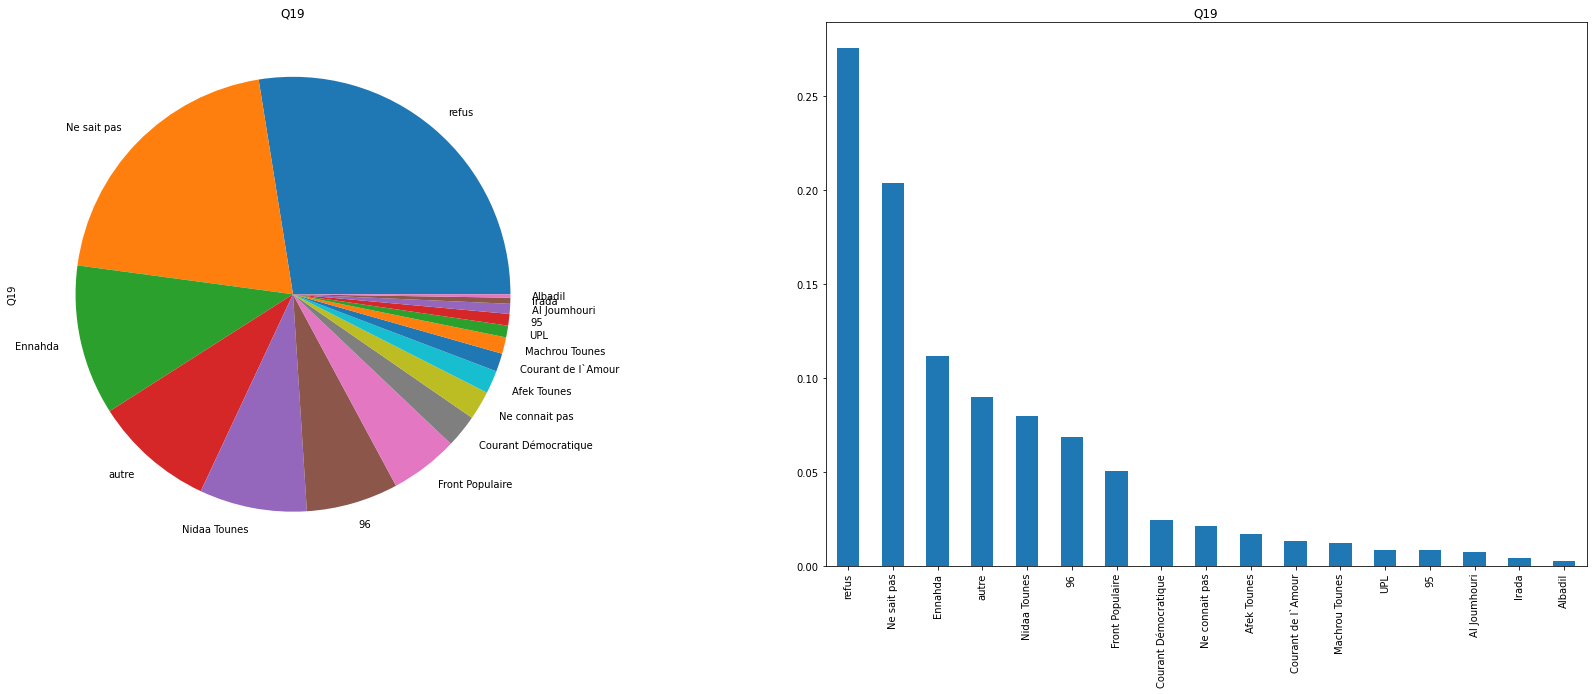

In [48]:
Dict={"Nidaa Tounes":1,"Ennahda":2,"Front Populaire":3,"UPL":4,"Afek Tounes":5,"Al Joumhouri":6,"Machrou Tounes":7,"Irada":8,"Courant Démocratique":9,
      "Courant de l`Amour":10,"Albadil":11,"autre":12,"refus":98,"Ne sait pas":97,"Ne connait pas":99}
for i,j in Dict.items():
  Base.loc[(Base['Q19'] == j)] = i
varc='Q19'
#Apercu générale sur la variable
print(Base[varc].value_counts())

plt.figure(figsize=(30,10))

#Distribution de la variable
plt.subplot(1,2,1)
Base[varc].value_counts(normalize=True).plot(kind='pie')
plt.title(varc)

#Distribution de la variable  
plt.subplot(1,2,2)
Base[varc].value_counts(normalize=True).plot(kind='bar')
plt.title(varc)